In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
import os
import shutil

# Definir el directorio de entrada y salida
train_dir = '../data/raw/train0'  # Carpeta donde están las imágenes sin organizar
pro_dir = '../data/processed/train'

dog_dir = os.path.join(pro_dir, 'dog')  # Carpeta donde se guardarán las imágenes de perros
cat_dir = os.path.join(pro_dir, 'cat')  # Carpeta donde se guardarán las imágenes de gatos

# Crear las carpetas para perros y gatos si no existen
os.makedirs(dog_dir, exist_ok=True)
os.makedirs(cat_dir, exist_ok=True)

# Iterar sobre todas las imágenes en el directorio de entrada
for img_name in os.listdir(train_dir):
    img_path = os.path.join(train_dir, img_name)
    
    # Verificar que es un archivo y no una carpeta
    if os.path.isfile(img_path):
        if 'dog' in img_name.lower():  # Si el nombre del archivo contiene 'dog'
            shutil.move(img_path, os.path.join(dog_dir, img_name))  # Mover a la carpeta 'dog'
        elif 'cat' in img_name.lower():  # Si el nombre del archivo contiene 'cat'
            shutil.move(img_path, os.path.join(cat_dir, img_name))  # Mover a la carpeta 'cat'

print("Las imágenes se han movido correctamente a las carpetas correspondientes.") 

Las imágenes se han movido correctamente a las carpetas correspondientes.


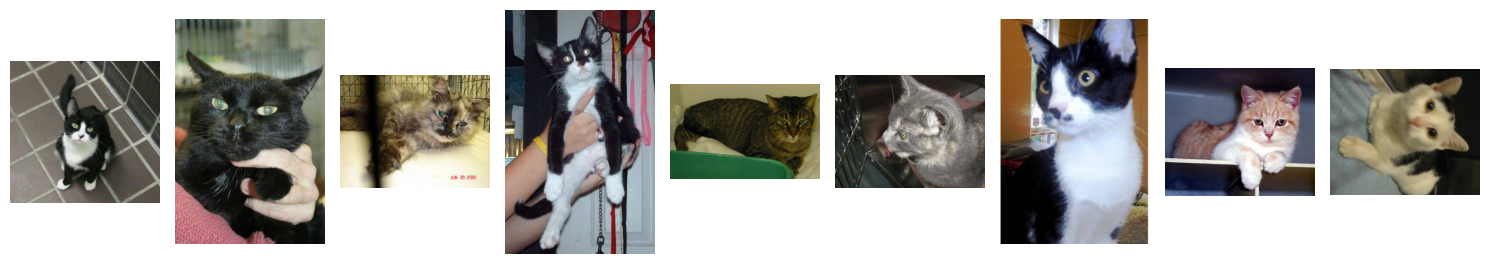

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def load_images(directory, n=9):
    images = []
    count = 0
    for img_name in os.listdir(directory):
        img_path = os.path.join(directory, img_name)
        if os.path.isfile(img_path):
            # Intentar abrir la imagen
            try:
                img = Image.open(img_path)
                images.append(img)
                count += 1
                if count >= n:  # Cargar solo las primeras n imágenes
                    break
            except Exception as e:
                print(f"No se pudo cargar la imagen {img_name}: {e}")
    return images

# Directorio con las imágenes 
raw_dir = "../data/processed/train/cat"

# Cargar las primeras 9 imágenes
images = load_images(raw_dir, n=9)

# Crear una figura con una fila de 9 subgráficas
fig, axes = plt.subplots(1, 9, figsize=(15, 5))

# Mostrar las imágenes en su tamaño original
for i, ax in enumerate(axes):
    ax.imshow(images[i])
    ax.axis('off')  # Desactivar los ejes

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()


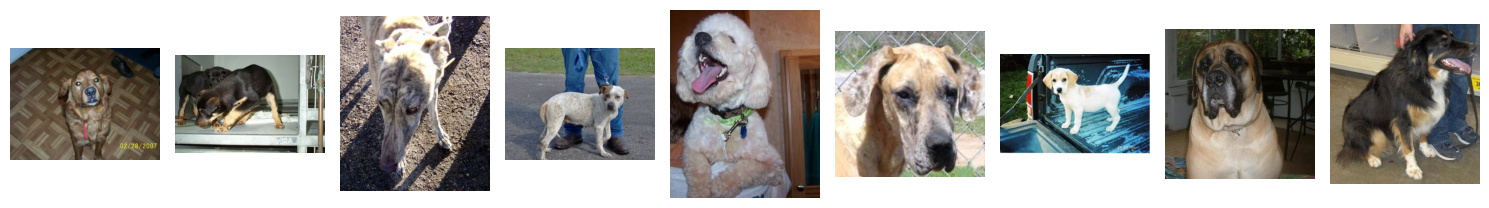

In [ ]:
# Directorio con las imágenes 
raw_dir = "../data/processed/train/dog"

# Cargar las primeras 9 imágenes
images = load_images(raw_dir, n=9)

# Crear una figura con una fila de 9 subgráficas
fig, axes = plt.subplots(1, 9, figsize=(15, 5))

# Mostrar las imágenes en su tamaño original
for i, ax in enumerate(axes):
    ax.imshow(images[i])
    ax.axis('off')  # Desactivar los ejes

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# Define a few rules for DataGen
train_dir = "../data/processed/train"
test_dir = "../data/raw"

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

# Train Data Generation
train_data = datagentrain.flow_from_directory(
    train_dir,
    classes=["dog", "cat"],  # Especificamos las clases
    target_size=(200, 200),   # Redimensionar todas las imágenes a 200x200 píxeles
    batch_size=32,            # Tamaño del lote
    class_mode='categorical'  # Tipo de etiquetas (categorical)
)

# Test Data Generation
test_data = datagentest.flow_from_directory(
    test_dir,
    classes=["test0"],         # Puedes cambiar "test" por las clases de test si es necesario
    target_size=(200, 200),   # Redimensionar todas las imágenes a 200x200 píxeles
    batch_size=32,            # Tamaño del lote
    class_mode='categorical'  # Tipo de etiquetas (categorical)
)


Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


In [7]:
# Move the Data Through the Neural Network
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))

# Move the Data through the Dense Layers
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

In [9]:
# Compile the Model using Adam 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# Compilar el modelo
model.compile(
    loss=categorical_crossentropy,  # Uso correcto de categorical_crossentropy
    optimizer=Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

In [10]:
# Train the Model
model.fit(train_data, epochs = 1)

/home/vscode/.local/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 26/782 ━━━━━━━━━━━━━━━━━━━━ 3:43:19 18s/step - accuracy: 0.5172 - loss: 165.4682

KeyboardInterrupt: 

In [11]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("../models/vgg16_1.h5", monitor = "val_accuracy", verbose = 1, save_best_only = True, save_weights_only = False, mode = "auto")
early = EarlyStopping(monitor = "val_accuracy", patience = 3, verbose = 1, mode = "auto")
hist = model.fit(train_data, steps_per_epoch = 100, validation_data = test_data, validation_steps = 10, epochs = 3, callbacks = [checkpoint, early])

Epoch 1/3


: 